In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
# define constant

FOLDER = 'datas/s40d30t1.6/'
GESTURES = ["topl", "twistl", "side", "downl", "twistr", "topr", "downr","unknown"]

DATA_POINT_PER_GESTURE = 30


SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Process data

In [3]:
inputsX = {1: [], 2: [], 5: [], 10: [], 15: [], 20: [], 30: []}
outputs = []

ONE_HOTS = np.eye(len(GESTURES))

for i in range(len(GESTURES)):
    g = GESTURES[i]
    print(f"Processing {i} for gesture '{g}'.")

    output = ONE_HOTS[i]

    df = pd.read_csv(FOLDER + g + '.csv')
    num_recordings = int(df.shape[0] / DATA_POINT_PER_GESTURE)

    for j in range(num_recordings):
        tensorX = {1: [], 2: [], 5: [], 10: [], 15: [], 20: [], 30: []}
        
        for k in range(DATA_POINT_PER_GESTURE):
            kk = j * DATA_POINT_PER_GESTURE + k
            for s in tensorX:
                if k < s:
                    tensorX[s] += [df['aX'][kk], df['aY'][kk], df['aZ'][kk], df['gX'][kk], df['gY'][kk], df['gZ'][kk]]

        for s in inputsX:
            inputsX[s].append(tensorX[s])
        
        outputs.append(output)



Processing 0 for gesture 'topl'.
Processing 1 for gesture 'twistl'.
Processing 2 for gesture 'side'.
Processing 3 for gesture 'downl'.
Processing 4 for gesture 'twistr'.
Processing 5 for gesture 'topr'.
Processing 6 for gesture 'downr'.
Processing 7 for gesture 'unknown'.


In [4]:
# for i,s in enumerate(inputsX):
#     print(i, s, inputsX[s][0])
#     print()

## Create train/validate/test datas

In [5]:
rdm_index = np.arange(len(inputsX[30]))
np.random.shuffle(rdm_index)

for s in inputsX:
    inputsX[s] = np.array(inputsX[s])[rdm_index]
outputs = np.array(outputs)[rdm_index]


## Build and train model

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

EPOCHS=150

In [7]:
def create_model(inputs, outputs, epoch=EPOCHS):
    TRAIN_SPLIT = int(0.5 * len(inputs))
    TEST_SPLIT = int(TRAIN_SPLIT + 0.25 * len(inputs))
    i_train, i_validate, i_test = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
    o_train, o_validate, o_test = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])
    
    i_train = tf.convert_to_tensor(i_train, dtype=tf.float32)
    o_train = tf.convert_to_tensor(o_train, dtype=tf.float32)
    i_validate = tf.convert_to_tensor(i_validate, dtype=tf.float32)
    o_validate = tf.convert_to_tensor(o_validate, dtype=tf.float32)

    i_test = tf.convert_to_tensor(i_test, dtype=tf.float32)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(len(GESTURES), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(i_train, o_train, epochs=epoch, batch_size=1,validation_data=(i_validate, o_validate))
    
    return model, history, i_test, o_test


models = {1: None, 2: None, 5: None, 10: None, 15: None, 20:None, 30: None}
histories = {1: None, 2: None, 5: None, 10: None, 15: None, 20:None, 30: None}
i_tests = {1: None, 2: None, 5: None, 10: None, 15: None, 20:None, 30: None}
o_tests = {1: None, 2: None, 5: None, 10: None, 15: None, 20:None, 30: None}


In [8]:
models[30], histories[30], i_tests[30], o_tests[30] = create_model(inputsX[30], outputs, 150)


Epoch 1/150
160/160 [==============================] - 1s 5ms/step - loss: 2.0812 - accuracy: 0.1562 - val_loss: 1.9472 - val_accuracy: 0.3750
Epoch 2/150
160/160 [==============================] - 1s 3ms/step - loss: 1.9059 - accuracy: 0.3063 - val_loss: 1.8335 - val_accuracy: 0.2500
Epoch 3/150
160/160 [==============================] - 1s 3ms/step - loss: 1.7768 - accuracy: 0.3313 - val_loss: 1.6182 - val_accuracy: 0.4625
Epoch 4/150
160/160 [==============================] - 1s 4ms/step - loss: 1.5678 - accuracy: 0.4437 - val_loss: 1.4965 - val_accuracy: 0.3750
Epoch 5/150
160/160 [==============================] - 1s 3ms/step - loss: 1.4044 - accuracy: 0.4875 - val_loss: 1.3930 - val_accuracy: 0.6000
Epoch 6/150
160/160 [==============================] - 1s 3ms/step - loss: 1.2659 - accuracy: 0.5500 - val_loss: 1.2987 - val_accuracy: 0.5875
Epoch 7/150
160/160 [==============================] - 0s 3ms/step - loss: 1.1611 - accuracy: 0.6187 - val_loss: 1.1131 - val_accuracy: 0.7375

Epoch 58/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.9563 - val_loss: 0.2419 - val_accuracy: 0.9000
Epoch 59/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9750 - val_loss: 0.1916 - val_accuracy: 0.9375
Epoch 60/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9750 - val_loss: 0.1776 - val_accuracy: 0.9375
Epoch 61/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9375 - val_loss: 0.2794 - val_accuracy: 0.9250
Epoch 62/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1283 - accuracy: 0.9625 - val_loss: 0.1554 - val_accuracy: 0.9375
Epoch 63/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9625 - val_loss: 0.1675 - val_accuracy: 0.9250
Epoch 64/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9750 - val_loss: 0.1265 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9937 - val_loss: 0.1145 - val_accuracy: 0.9500
Epoch 116/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9937 - val_loss: 0.1256 - val_accuracy: 0.9375
Epoch 117/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 118/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9688 - val_loss: 0.1911 - val_accuracy: 0.9500
Epoch 119/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9688 - val_loss: 0.0667 - val_accuracy: 0.9875
Epoch 120/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9937 - val_loss: 0.1039 - val_accuracy: 0.9500
Epoch 121/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9937 - val_loss: 0.2017 - val_ac

In [9]:
models[20], histories[20], i_tests[20], o_tests[20] = create_model(inputsX[20], outputs, 150)


Epoch 1/150
160/160 [==============================] - 1s 5ms/step - loss: 2.0399 - accuracy: 0.1500 - val_loss: 1.9585 - val_accuracy: 0.2875
Epoch 2/150
160/160 [==============================] - 0s 3ms/step - loss: 1.9222 - accuracy: 0.1937 - val_loss: 1.8724 - val_accuracy: 0.2250
Epoch 3/150
160/160 [==============================] - 1s 3ms/step - loss: 1.8187 - accuracy: 0.3125 - val_loss: 1.7589 - val_accuracy: 0.2750
Epoch 4/150
160/160 [==============================] - 1s 3ms/step - loss: 1.7033 - accuracy: 0.4750 - val_loss: 1.6240 - val_accuracy: 0.4875
Epoch 5/150
160/160 [==============================] - 1s 3ms/step - loss: 1.5581 - accuracy: 0.5063 - val_loss: 1.4795 - val_accuracy: 0.6125
Epoch 6/150
160/160 [==============================] - 1s 3ms/step - loss: 1.3977 - accuracy: 0.5813 - val_loss: 1.4325 - val_accuracy: 0.6000
Epoch 7/150
160/160 [==============================] - 1s 3ms/step - loss: 1.2456 - accuracy: 0.6625 - val_loss: 1.2074 - val_accuracy: 0.7125

Epoch 58/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9125 - val_loss: 0.2040 - val_accuracy: 0.9250
Epoch 59/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1903 - accuracy: 0.9375 - val_loss: 0.2228 - val_accuracy: 0.9375
Epoch 60/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.9312 - val_loss: 0.1745 - val_accuracy: 0.9625
Epoch 61/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9250 - val_loss: 0.2548 - val_accuracy: 0.9250
Epoch 62/150
160/160 [==============================] - 1s 4ms/step - loss: 0.1897 - accuracy: 0.9438 - val_loss: 0.1965 - val_accuracy: 0.9500
Epoch 63/150
160/160 [==============================] - 1s 4ms/step - loss: 0.1657 - accuracy: 0.9500 - val_loss: 0.2462 - val_accuracy: 0.9250
Epoch 64/150
160/160 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.9125 - val_loss: 0.1767 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9875 - val_loss: 0.0652 - val_accuracy: 0.9875
Epoch 116/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9875 - val_loss: 0.0671 - val_accuracy: 0.9625
Epoch 117/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9688 - val_loss: 0.0527 - val_accuracy: 0.9875
Epoch 118/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9875 - val_loss: 0.0569 - val_accuracy: 0.9875
Epoch 119/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9563 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 120/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9875 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 121/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9937 - val_loss: 0.0532 - val_ac

In [10]:
models[15], histories[15], i_tests[15], o_tests[15] = create_model(inputsX[15], outputs,150)


Epoch 1/150
160/160 [==============================] - 1s 4ms/step - loss: 2.0592 - accuracy: 0.1375 - val_loss: 2.0447 - val_accuracy: 0.1125
Epoch 2/150
160/160 [==============================] - 1s 4ms/step - loss: 1.9784 - accuracy: 0.1500 - val_loss: 1.9692 - val_accuracy: 0.1125
Epoch 3/150
160/160 [==============================] - 1s 3ms/step - loss: 1.8817 - accuracy: 0.1625 - val_loss: 1.8934 - val_accuracy: 0.2250
Epoch 4/150
160/160 [==============================] - 0s 3ms/step - loss: 1.7928 - accuracy: 0.1875 - val_loss: 1.8303 - val_accuracy: 0.1750
Epoch 5/150
160/160 [==============================] - 0s 3ms/step - loss: 1.7054 - accuracy: 0.2188 - val_loss: 1.8015 - val_accuracy: 0.3250
Epoch 6/150
160/160 [==============================] - 1s 4ms/step - loss: 1.6227 - accuracy: 0.3125 - val_loss: 1.7320 - val_accuracy: 0.2375
Epoch 7/150
160/160 [==============================] - 1s 3ms/step - loss: 1.5462 - accuracy: 0.4125 - val_loss: 1.6363 - val_accuracy: 0.2875

Epoch 58/150
160/160 [==============================] - 1s 4ms/step - loss: 0.3169 - accuracy: 0.8625 - val_loss: 0.4606 - val_accuracy: 0.8500
Epoch 59/150
160/160 [==============================] - 1s 4ms/step - loss: 0.3106 - accuracy: 0.9375 - val_loss: 0.5040 - val_accuracy: 0.7750
Epoch 60/150
160/160 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.9187 - val_loss: 0.4034 - val_accuracy: 0.9250
Epoch 61/150
160/160 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.9125 - val_loss: 0.4005 - val_accuracy: 0.9000
Epoch 62/150
160/160 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.9250 - val_loss: 0.3925 - val_accuracy: 0.9125
Epoch 63/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9312 - val_loss: 0.4055 - val_accuracy: 0.8750
Epoch 64/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.9312 - val_loss: 0.4095 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1244 - accuracy: 0.9688 - val_loss: 0.1659 - val_accuracy: 0.9500
Epoch 116/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9812 - val_loss: 0.1569 - val_accuracy: 0.9500
Epoch 117/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9812 - val_loss: 0.1974 - val_accuracy: 0.9375
Epoch 118/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1102 - accuracy: 0.9750 - val_loss: 0.1680 - val_accuracy: 0.9500
Epoch 119/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1010 - accuracy: 0.9688 - val_loss: 0.1650 - val_accuracy: 0.9500
Epoch 120/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9750 - val_loss: 0.1535 - val_accuracy: 0.9500
Epoch 121/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9563 - val_loss: 0.1604 - val_ac

In [11]:
models[10], histories[10], i_tests[10], o_tests[10] = create_model(inputsX[10], outputs,150)

Epoch 1/150
160/160 [==============================] - 1s 4ms/step - loss: 2.1021 - accuracy: 0.1187 - val_loss: 2.0535 - val_accuracy: 0.0500
Epoch 2/150
160/160 [==============================] - 1s 3ms/step - loss: 2.0221 - accuracy: 0.2750 - val_loss: 1.9831 - val_accuracy: 0.3375
Epoch 3/150
160/160 [==============================] - 1s 4ms/step - loss: 1.9462 - accuracy: 0.4375 - val_loss: 1.9081 - val_accuracy: 0.5500
Epoch 4/150
160/160 [==============================] - 1s 3ms/step - loss: 1.8492 - accuracy: 0.4938 - val_loss: 1.7979 - val_accuracy: 0.6000
Epoch 5/150
160/160 [==============================] - 1s 3ms/step - loss: 1.7065 - accuracy: 0.5188 - val_loss: 1.6771 - val_accuracy: 0.5750
Epoch 6/150
160/160 [==============================] - 1s 3ms/step - loss: 1.5424 - accuracy: 0.5312 - val_loss: 1.5754 - val_accuracy: 0.5500
Epoch 7/150
160/160 [==============================] - 1s 3ms/step - loss: 1.3789 - accuracy: 0.5938 - val_loss: 1.4022 - val_accuracy: 0.6375

Epoch 58/150
160/160 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8687 - val_loss: 0.3384 - val_accuracy: 0.8750
Epoch 59/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.9062 - val_loss: 0.3525 - val_accuracy: 0.8500
Epoch 60/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.9000 - val_loss: 0.3483 - val_accuracy: 0.8625
Epoch 61/150
160/160 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8938 - val_loss: 0.3354 - val_accuracy: 0.8750
Epoch 62/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.8813 - val_loss: 0.3589 - val_accuracy: 0.9000
Epoch 63/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.9000 - val_loss: 0.3730 - val_accuracy: 0.8500
Epoch 64/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8875 - val_loss: 0.3447 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1838 - accuracy: 0.9375 - val_loss: 0.3016 - val_accuracy: 0.8750
Epoch 116/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1840 - accuracy: 0.9438 - val_loss: 0.2789 - val_accuracy: 0.9000
Epoch 117/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1756 - accuracy: 0.9500 - val_loss: 0.2778 - val_accuracy: 0.9000
Epoch 118/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9312 - val_loss: 0.2798 - val_accuracy: 0.8875
Epoch 119/150
160/160 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9312 - val_loss: 0.3215 - val_accuracy: 0.8875
Epoch 120/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1713 - accuracy: 0.9438 - val_loss: 0.3399 - val_accuracy: 0.8875
Epoch 121/150
160/160 [==============================] - 1s 3ms/step - loss: 0.1690 - accuracy: 0.9625 - val_loss: 0.2833 - val_ac

In [12]:
models[5], histories[5], i_tests[5], o_tests[5] = create_model(inputsX[5], outputs,150)

Epoch 1/150
160/160 [==============================] - 1s 4ms/step - loss: 2.0767 - accuracy: 0.1562 - val_loss: 2.0932 - val_accuracy: 0.2125
Epoch 2/150
160/160 [==============================] - 0s 3ms/step - loss: 2.0195 - accuracy: 0.3000 - val_loss: 2.0488 - val_accuracy: 0.2875
Epoch 3/150
160/160 [==============================] - 1s 3ms/step - loss: 1.9538 - accuracy: 0.3750 - val_loss: 1.9778 - val_accuracy: 0.3250
Epoch 4/150
160/160 [==============================] - 0s 3ms/step - loss: 1.8254 - accuracy: 0.4750 - val_loss: 1.8531 - val_accuracy: 0.5000
Epoch 5/150
160/160 [==============================] - 0s 3ms/step - loss: 1.6809 - accuracy: 0.5938 - val_loss: 1.7253 - val_accuracy: 0.5375
Epoch 6/150
160/160 [==============================] - 1s 3ms/step - loss: 1.5302 - accuracy: 0.6375 - val_loss: 1.5877 - val_accuracy: 0.5250
Epoch 7/150
160/160 [==============================] - 1s 3ms/step - loss: 1.3878 - accuracy: 0.6562 - val_loss: 1.4233 - val_accuracy: 0.5500

Epoch 58/150
160/160 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8438 - val_loss: 0.5052 - val_accuracy: 0.8500
Epoch 59/150
160/160 [==============================] - 1s 4ms/step - loss: 0.3964 - accuracy: 0.8125 - val_loss: 0.5234 - val_accuracy: 0.8375
Epoch 60/150
160/160 [==============================] - 1s 3ms/step - loss: 0.3843 - accuracy: 0.8562 - val_loss: 0.4960 - val_accuracy: 0.8375
Epoch 61/150
160/160 [==============================] - 1s 3ms/step - loss: 0.3922 - accuracy: 0.8500 - val_loss: 0.5114 - val_accuracy: 0.8250
Epoch 62/150
160/160 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8562 - val_loss: 0.4682 - val_accuracy: 0.8625
Epoch 63/150
160/160 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8687 - val_loss: 0.5447 - val_accuracy: 0.8375
Epoch 64/150
160/160 [==============================] - 1s 4ms/step - loss: 0.3885 - accuracy: 0.8000 - val_loss: 0.4705 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.3664 - val_accuracy: 0.8750
Epoch 116/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2741 - accuracy: 0.8750 - val_loss: 0.3624 - val_accuracy: 0.8875
Epoch 117/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.8938 - val_loss: 0.3445 - val_accuracy: 0.9000
Epoch 118/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.9125 - val_loss: 0.3400 - val_accuracy: 0.8875
Epoch 119/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8938 - val_loss: 0.3883 - val_accuracy: 0.8750
Epoch 120/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.8750 - val_loss: 0.3725 - val_accuracy: 0.8750
Epoch 121/150
160/160 [==============================] - 0s 3ms/step - loss: 0.2551 - accuracy: 0.8938 - val_loss: 0.3577 - val_ac

In [13]:
models[2], histories[2], i_tests[2], o_tests[2] = create_model(inputsX[2], outputs,150)

Epoch 1/150
160/160 [==============================] - 1s 4ms/step - loss: 2.1086 - accuracy: 0.1375 - val_loss: 2.0844 - val_accuracy: 0.2125
Epoch 2/150
160/160 [==============================] - 0s 3ms/step - loss: 2.0654 - accuracy: 0.1750 - val_loss: 2.0596 - val_accuracy: 0.1125
Epoch 3/150
160/160 [==============================] - 0s 3ms/step - loss: 2.0433 - accuracy: 0.1813 - val_loss: 2.0448 - val_accuracy: 0.1250
Epoch 4/150
160/160 [==============================] - 0s 3ms/step - loss: 2.0213 - accuracy: 0.2750 - val_loss: 2.0381 - val_accuracy: 0.1625
Epoch 5/150
160/160 [==============================] - 0s 3ms/step - loss: 1.9993 - accuracy: 0.2688 - val_loss: 2.0129 - val_accuracy: 0.2375
Epoch 6/150
160/160 [==============================] - 1s 3ms/step - loss: 1.9668 - accuracy: 0.3063 - val_loss: 1.9823 - val_accuracy: 0.3375
Epoch 7/150
160/160 [==============================] - 1s 3ms/step - loss: 1.9380 - accuracy: 0.3500 - val_loss: 1.9472 - val_accuracy: 0.2875

Epoch 58/150
160/160 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.8125 - val_loss: 0.7355 - val_accuracy: 0.8125
Epoch 59/150
160/160 [==============================] - 1s 5ms/step - loss: 0.5837 - accuracy: 0.8062 - val_loss: 0.7780 - val_accuracy: 0.7875
Epoch 60/150
160/160 [==============================] - 1s 3ms/step - loss: 0.5740 - accuracy: 0.8125 - val_loss: 0.7553 - val_accuracy: 0.7875
Epoch 61/150
160/160 [==============================] - 1s 4ms/step - loss: 0.5716 - accuracy: 0.8000 - val_loss: 0.7171 - val_accuracy: 0.8125
Epoch 62/150
160/160 [==============================] - 1s 4ms/step - loss: 0.5741 - accuracy: 0.8000 - val_loss: 0.7096 - val_accuracy: 0.8125
Epoch 63/150
160/160 [==============================] - 1s 4ms/step - loss: 0.5650 - accuracy: 0.7937 - val_loss: 0.7147 - val_accuracy: 0.8000
Epoch 64/150
160/160 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.7937 - val_loss: 0.7259 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.9000 - val_loss: 0.5200 - val_accuracy: 0.9000
Epoch 116/150
160/160 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.8813 - val_loss: 0.5086 - val_accuracy: 0.8625
Epoch 117/150
160/160 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8938 - val_loss: 0.4926 - val_accuracy: 0.8875
Epoch 118/150
160/160 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8750 - val_loss: 0.5109 - val_accuracy: 0.8750
Epoch 119/150
160/160 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8687 - val_loss: 0.5223 - val_accuracy: 0.8750
Epoch 120/150
160/160 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8813 - val_loss: 0.5530 - val_accuracy: 0.8750
Epoch 121/150
160/160 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8938 - val_loss: 0.4976 - val_ac

In [14]:
models[1], histories[1], i_tests[1], o_tests[1] = create_model(inputsX[1], outputs,150)

Epoch 1/150
160/160 [==============================] - 1s 4ms/step - loss: 2.0843 - accuracy: 0.1375 - val_loss: 2.0910 - val_accuracy: 0.0750
Epoch 2/150
160/160 [==============================] - 0s 3ms/step - loss: 2.0495 - accuracy: 0.0875 - val_loss: 2.0598 - val_accuracy: 0.0625
Epoch 3/150
160/160 [==============================] - 0s 3ms/step - loss: 2.0252 - accuracy: 0.0875 - val_loss: 2.0446 - val_accuracy: 0.1125
Epoch 4/150
160/160 [==============================] - 1s 3ms/step - loss: 2.0085 - accuracy: 0.1562 - val_loss: 2.0187 - val_accuracy: 0.1625
Epoch 5/150
160/160 [==============================] - 0s 3ms/step - loss: 1.9840 - accuracy: 0.2188 - val_loss: 2.0025 - val_accuracy: 0.1875
Epoch 6/150
160/160 [==============================] - 0s 3ms/step - loss: 1.9566 - accuracy: 0.2250 - val_loss: 1.9653 - val_accuracy: 0.2625
Epoch 7/150
160/160 [==============================] - 1s 3ms/step - loss: 1.9293 - accuracy: 0.2375 - val_loss: 1.9334 - val_accuracy: 0.2500

Epoch 58/150
160/160 [==============================] - 1s 3ms/step - loss: 0.9332 - accuracy: 0.6438 - val_loss: 1.0438 - val_accuracy: 0.6125
Epoch 59/150
160/160 [==============================] - 0s 3ms/step - loss: 0.9285 - accuracy: 0.6562 - val_loss: 1.0827 - val_accuracy: 0.6000
Epoch 60/150
160/160 [==============================] - 1s 3ms/step - loss: 0.9122 - accuracy: 0.6687 - val_loss: 1.1192 - val_accuracy: 0.6250
Epoch 61/150
160/160 [==============================] - 0s 3ms/step - loss: 0.9273 - accuracy: 0.6438 - val_loss: 1.0834 - val_accuracy: 0.6750
Epoch 62/150
160/160 [==============================] - 0s 3ms/step - loss: 0.9173 - accuracy: 0.6500 - val_loss: 1.0389 - val_accuracy: 0.6750
Epoch 63/150
160/160 [==============================] - 0s 3ms/step - loss: 0.9053 - accuracy: 0.7000 - val_loss: 1.0301 - val_accuracy: 0.6500
Epoch 64/150
160/160 [==============================] - 1s 3ms/step - loss: 0.9065 - accuracy: 0.6438 - val_loss: 1.0216 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.7812 - val_loss: 0.7852 - val_accuracy: 0.8000
Epoch 116/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.7812 - val_loss: 0.7765 - val_accuracy: 0.7875
Epoch 117/150
160/160 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.7750 - val_loss: 0.7680 - val_accuracy: 0.8125
Epoch 118/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.7812 - val_loss: 0.7579 - val_accuracy: 0.8375
Epoch 119/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.7875 - val_loss: 0.8134 - val_accuracy: 0.7625
Epoch 120/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7812 - val_loss: 0.7806 - val_accuracy: 0.7875
Epoch 121/150
160/160 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.7812 - val_loss: 0.7496 - val_ac

## Review models' performance

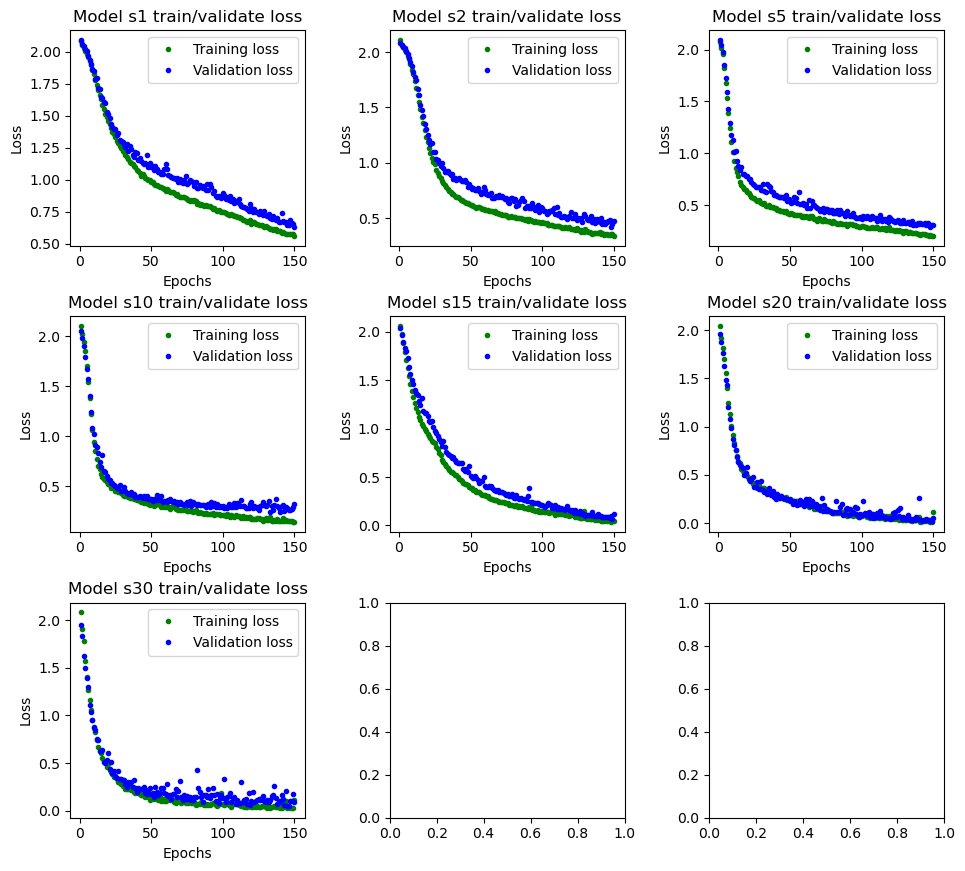

In [15]:
# increase the size of the graphs. The default size is (6,4).
fig, axs = plt.subplots(3, 3, figsize=(10, 9))
fig.tight_layout(pad=3.0)
def plot_model_loss(history, title, i):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    ax = axs[int(i/3), i % 3]
    ax.plot(epochs, loss, 'g.', label='Training loss')
    ax.plot(epochs, val_loss, 'b.', label='Validation loss')
    ax.set_title(title)
#     ax.xlabel('Epochs')
#     ax.ylabel('Loss')
    ax.set(xlabel='Epochs', ylabel='Loss')
    ax.legend()
#     ax.show()

for i, s in enumerate(histories):
    plot_model_loss(histories[s], 'Model s'+ str(s) + ' train/validate loss', i)

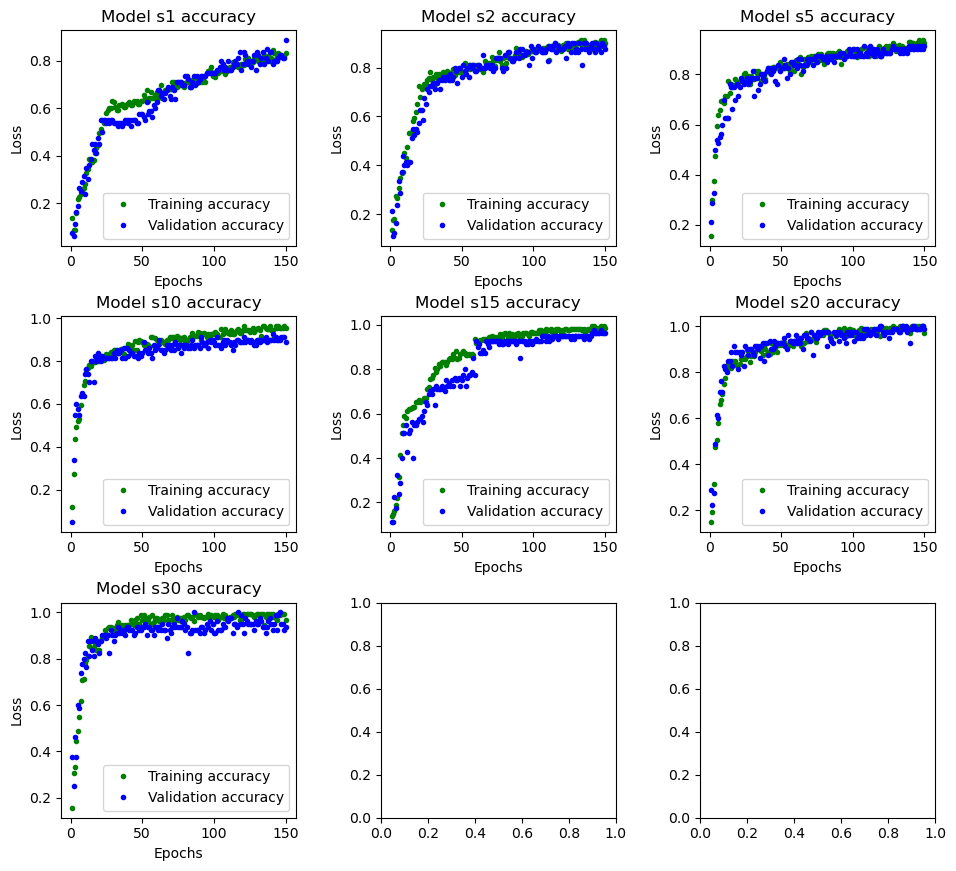

In [16]:
# increase the size of the graphs. The default size is (6,4).
fig, axs = plt.subplots(3, 3, figsize=(10, 9))
fig.tight_layout(pad=3.0)
def plot_model_accuracy(history, title, i):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)
    
    ax = axs[int(i/3), i % 3]
    ax.plot(epochs, accuracy, 'g.', label='Training accuracy')
    ax.plot(epochs, val_accuracy, 'b.', label='Validation accuracy')
    ax.set_title(title)
    ax.set(xlabel='Epochs', ylabel='Loss')
    ax.legend()

for i, s in enumerate(histories):
    plot_model_accuracy(histories[s], 'Model s'+ str(s) + ' accuracy', i)

## Verify models with test data

3/3 [==============================] - 0s 3ms/step


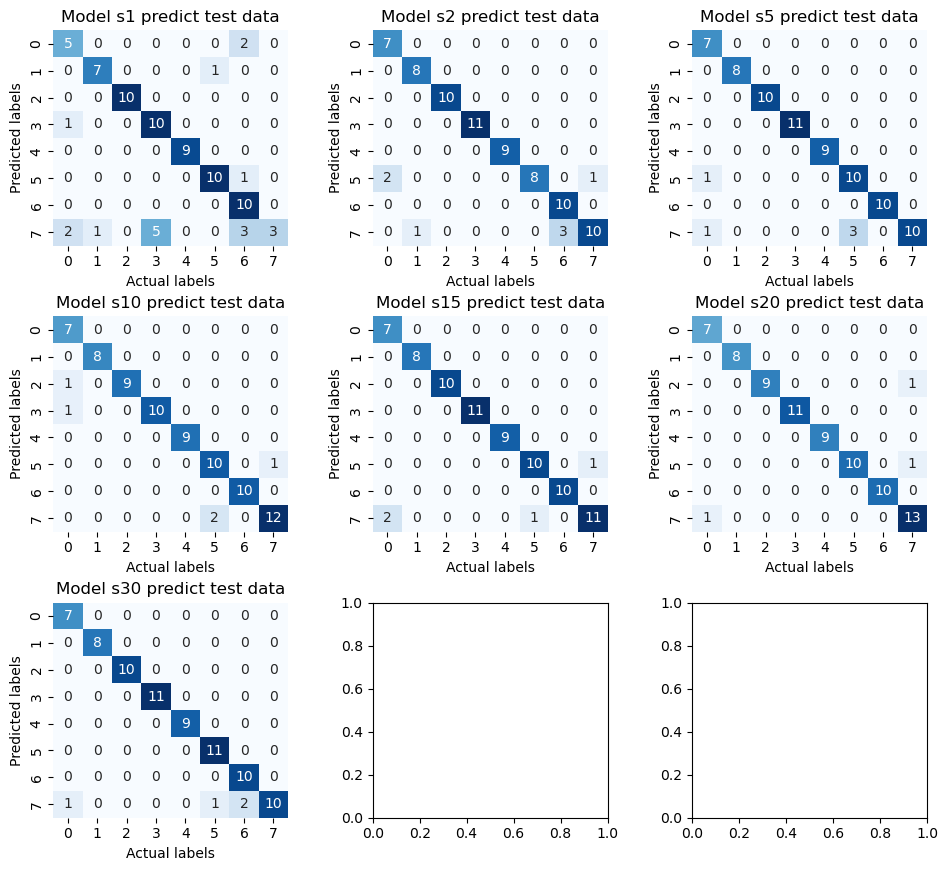

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(10, 9))
fig.tight_layout(pad=3.0)
def plot_cm(model, title, i):
    predict = model.predict(i_tests[s])
    conf_mat = confusion_matrix(np.argmax(o_tests[s], axis=1), np.argmax(predict, axis=1))
    ax = axs[int(i/3), i % 3]
    sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set(xlabel='Actual labels', ylabel='Predicted labels')

for i, s in enumerate(models):
    plot_cm(models[s], 'Model s'+ str(s) + ' predict test data', i)

## Produce model file (.tflite)

Output both non-quantized and quantized model files


In [18]:
for i, s in enumerate(models):
    def representative_dataset_generator():
         # each scalar value inside a 2D array that is wrapped in a list
         for value in inputsX[s]:
             yield [np.array(value, dtype=np.float32, ndmin=2)]
                
    TFLITE_FILE = 'tflite/input_size/gesture_model_s' + str(s) + '.tflite'
    TFLITE_FILE_Q = 'tflite/input_size/gesture_model_s' + str(s) + 'q.tflite'
    converter = tf.lite.TFLiteConverter.from_keras_model(models[s])
    tflite_model = converter.convert()
    open(TFLITE_FILE, "wb").write(tflite_model)
    
    converter_q = tf.lite.TFLiteConverter.from_keras_model(models[s])
    converter_q.optimizations = [tf.lite.Optimize.DEFAULT]
    converter_q.representative_dataset = representative_dataset_generator
    tflite_model_q = converter_q.convert()
    open(TFLITE_FILE_Q, "wb").write(tflite_model_q)
    
    # Review size difference
    basic_model_size = os.path.getsize(TFLITE_FILE)
    print("Basic model{} is {} bytes".format(i, basic_model_size))

    basic_model_size_q = os.path.getsize(TFLITE_FILE_Q)
    print("Quantized model{} is {} bytes".format(i, basic_model_size_q))


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpvc5wpkmo\assets
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpbb6uumrf\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpbb6uumrf\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model0 is 3444 bytes
Quantized model0 is 3312 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp029kb54j\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp029kb54j\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpm1tejkij\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpm1tejkij\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model1 is 3828 bytes
Quantized model1 is 3408 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpedt3z16s\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpedt3z16s\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpj1i0ly67\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpj1i0ly67\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model2 is 4980 bytes
Quantized model2 is 3696 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp6kwzpkj8\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp6kwzpkj8\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpdzr2366h\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpdzr2366h\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model3 is 6884 bytes
Quantized model3 is 4160 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpm46_npfv\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpm46_npfv\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp41z8gkt9\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp41z8gkt9\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model4 is 8780 bytes
Quantized model4 is 4616 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpv6gy9msh\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpv6gy9msh\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpbwjb_0o4\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpbwjb_0o4\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model5 is 10700 bytes
Quantized model5 is 5096 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp29u2ct_n\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp29u2ct_n\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpi1tkxepw\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpi1tkxepw\assets


Basic model6 is 14508 bytes
Quantized model6 is 6032 bytes


C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Verify the interpreter (.tflite)

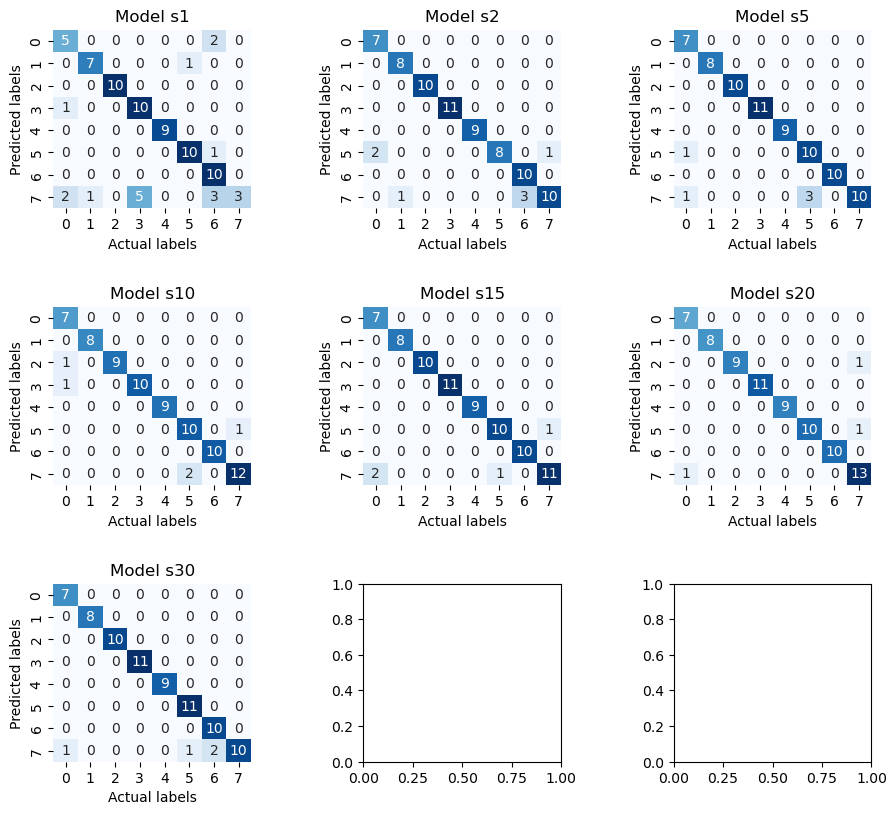

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(10, 9))
fig.tight_layout(pad=5.0)

for i, s in enumerate(models):
    TFLITE_FILE = 'tflite/input_size/gesture_model_s' + str(s) + '.tflite'
    model = tf.lite.Interpreter(TFLITE_FILE)
    model.allocate_tensors()
    model_input_index = model.get_input_details()[0]['index']
    model_output_index = model.get_output_details()[0]['index']
    predict = []
    for j in i_tests[s]:
    # write the value to the input tensor
        i_tensor = tf.convert_to_tensor([j], dtype=tf.float32)
        model.set_tensor(model_input_index, i_tensor)
        # run inference
        model.invoke()
        # read the prediction from the output tensor
        predict.append(model.get_tensor(model_output_index)[0])
        
    ax = axs[int(i/3), i % 3]
    conf_mat = confusion_matrix(np.argmax(o_tests[s], axis=1), np.argmax(predict, axis=1))

    sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_title("Model s" + str(s))
    ax.set(xlabel='Actual labels', ylabel='Predicted labels')

## Verify the quantized interpreter (.tflite)

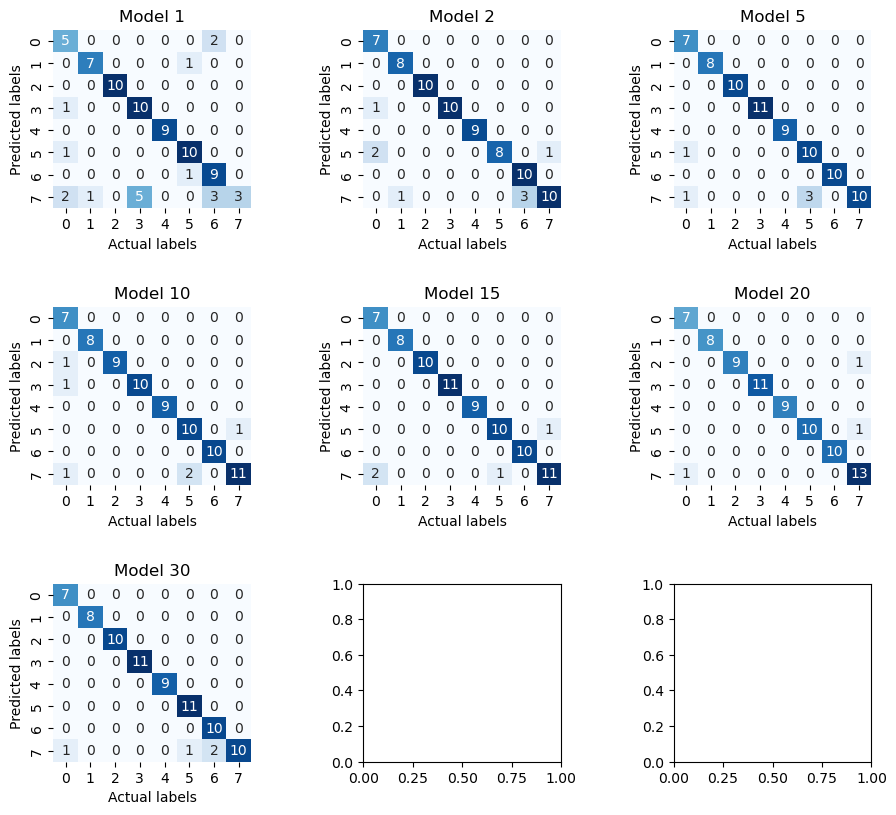

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(10, 9))
fig.tight_layout(pad=5.0)

for i, s in enumerate(models):
    TFLITE_FILE_Q = 'tflite/input_size/gesture_model_s' + str(s) + 'q.tflite'
    model = tf.lite.Interpreter(TFLITE_FILE_Q)
    model.allocate_tensors()
    model_input_index = model.get_input_details()[0]['index']
    model_output_index = model.get_output_details()[0]['index']
    predict = []
    for j in i_tests[s]:
    # write the value to the input tensor
        i_tensor = tf.convert_to_tensor([j], dtype=tf.float32)
        model.set_tensor(model_input_index, i_tensor)
        # run inference
        model.invoke()
        # read the prediction from the output tensor
        predict.append(model.get_tensor(model_output_index)[0])
        
    ax = axs[int(i/3), i % 3]
    conf_mat = confusion_matrix(np.argmax(o_tests[s], axis=1), np.argmax(predict, axis=1))
    sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_title("Model " + str(s))
    ax.set(xlabel='Actual labels', ylabel='Predicted labels')


## Produce the model header file

In [21]:
# to run below command, ensure jupyter notebook is launched under bash terminal (eg. git bash, linux terminal)

for i, s in enumerate(models):
    TFLITE_FILE = 'tflite/input_size/gesture_model_s' + str(s) + '.tflite'
    TFLITE_FILE_Q = 'tflite/input_size/gesture_model_s' + str(s) + 'q.tflite'
    
    HEADER_FILE = '../ble_client/input_size/gesture_model_s'+str(s)+'.h'
    HEADER_FILE_Q = '../ble_client/input_size/gesture_model_s'+str(s)+'q.h'
    # based model header file
    str1 = "const unsigned char {} [] = {{".format('gesture_model')
    str2 = "};"

    !echo {str1}  > {HEADER_FILE}
    !cat {TFLITE_FILE} | xxd -i >> {HEADER_FILE}
    !echo {str2} >> {HEADER_FILE}

    # quantized model header file
    str3 = "const unsigned char {} [] = {{".format('gesture_model_q')

    !echo {str3}  > {HEADER_FILE_Q}
    !cat {TFLITE_FILE_Q} | xxd -i >> {HEADER_FILE_Q}
    !echo {str2} >> {HEADER_FILE_Q}